## ---------------------------------------------------------------CHAPTER 1

In [6]:
#import library
import pandas as pd
pd.options.display.max_columns = 50

#import dataset
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

#Tampilkan jumlah baris dan kolom
print(df_load.shape)

#Tampilkan 5 data teratas
print(df_load.head(5))

#Jumlah ID yang unik
print(df_load.customerID.nunique())
print(df_load.value_counts('customerID'))

(7113, 22)
   UpdatedAt   customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     202006  45759018157  Female              0     Yes         No     1.0   
1     202006  45557574145    Male              0      No         No    34.0   
2     202006  45366876421    Male              0      No         No     2.0   
3     202006  45779536532    Male              0      No         No    45.0   
4     202006  45923787906  Female              0      No         No     2.0   

  PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0           No  No phone service             DSL             No          Yes   
1          Yes                No             DSL            Yes           No   
2          Yes                No             DSL            Yes          Yes   
3           No  No phone service             DSL            Yes           No   
4          Yes                No     Fiber optic             No           No   

  DeviceProtection TechSupport St

## ---------------------------------------------------CHAPTER 3

### Mencari Validitas ID Number Pelanggan

In [25]:
import pandas as pd
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
print('Hasil jumlah ID Customer yang terfilter adalah',df_load['customerID'].count())


df_load['customerID'].astype(str).str.match(r'(45\d{9,10})') 

Hasil jumlah ID Customer yang terfilter adalah 7006


0       False
1       False
2       False
3       False
4       False
        ...  
7108    False
7109    False
7110    False
7111    False
7112    False
Name: customerID, Length: 7006, dtype: bool

In [37]:
import pandas as pd
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

# Drop Duplicate Rows
df_load.drop_duplicates()
# Drop duplicate ID sorted by Periode
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates(['customerID'])
print('Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah',df_load['customerID'].count())

df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates(['customerID'])
# df_load.drop_duplicates(['customerID']).sort_values('UpdatedAt', ascending=False)



Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah 7017


,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
23,202006,45363825122,Female,0,Yes,No,58.0,Yes,Yes,DSL,No,Yes,No,Yes,No,No,Two year,Yes,Credit card (automatic),59.90,3505.10,No
11,202006,45746921239,Male,0,No,No,16.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.80,No
12,202006,45809100113,Male,0,Yes,No,58.0,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.10,No
53,202006,45749555164,Female,1,Yes,No,8.0,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),80.65,633.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7065,202006,450644FG341,Male,1,No,No,4.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.65,293.85,No
7066,202006,454077HI533,Female,0,Yes,Yes,31.0,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.20,3243.45,Yes
7067,202006,4531JK36957,Male,0,Yes,Yes,47.0,Yes,No,Fiber optic,Yes,No,Yes,No,No,Yes,Month-to-month,No,Electronic check,90.05,4137.20,No
7068,202006,45LM6835177,Male,0,No,No,1.0,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.25,79.25,Yes


## ---------------------------------------------------------CHAPTER 4

### Mengatasi Missing Values

In [54]:
import pandas as pd
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

print('Total missing values data dari kolom Churn', df_load['Churn'].isnull().sum())
# Dropping all Rows with spesific column (churn)
df_load.dropna(subset=['Churn'], inplace=True)
print('Total Rows dan kolom Data setelah dihapus data Missing Values adalah', df_load.shape)



Total missing values data dari kolom Churn 43
Total Rows dan kolom Data setelah dihapus data Missing Values adalah (7070, 22)


In [72]:
import pandas as pd
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

print('Status Missing Values:', df_load.isnull().values.any())
print('\nJumlah Missing Values masing-masing kolom, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))

#handling missing values Tenure fill with 11
df_load['tenure'].fillna(11, inplace=True)

#Loop
#Handling missing values num vars (except Tenure)
for col_name in list(['MonthlyCharges','TotalCharges']):
    median = df_load[col_name].median()
    df_load[col_name].fillna(median, inplace=True)

print('\nJumlah Missing Values setelah di imputer datanya, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))
    

Status Missing Values: True

Jumlah Missing Values masing-masing kolom, adalah:
tenure              99
Churn               43
MonthlyCharges      26
TotalCharges        15
DeviceProtection     0
PaymentMethod        0
PaperlessBilling     0
Contract             0
StreamingMovies      0
StreamingTV          0
TechSupport          0
UpdatedAt            0
customerID           0
OnlineSecurity       0
InternetService      0
MultipleLines        0
PhoneService         0
Dependents           0
Partner              0
SeniorCitizen        0
gender               0
OnlineBackup         0
dtype: int64

Jumlah Missing Values setelah di imputer datanya, adalah:
Churn               43
customerID           0
TotalCharges         0
MonthlyCharges       0
PaymentMethod        0
PaperlessBilling     0
Contract             0
StreamingMovies      0
StreamingTV          0
TechSupport          0
DeviceProtection     0
UpdatedAt            0
OnlineSecurity       0
InternetService      0
MultipleLines       

## ---------------------------------------------------------CHAPTER 5

### Mengatasi Outlier


Persebaran data sebelum ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  7014.000000     7087.000000   7098.000000
mean     32.749358       67.018985   2306.582650
std      25.206376      117.396646   2575.212013
min       0.000000        0.000000     19.000000
25%       9.000000       36.100000    402.925000
50%      30.000000       70.450000   1400.700000
75%      56.000000       89.900000   3801.600000
max     500.000000     9000.000000  80000.000000


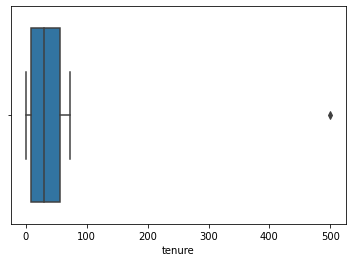

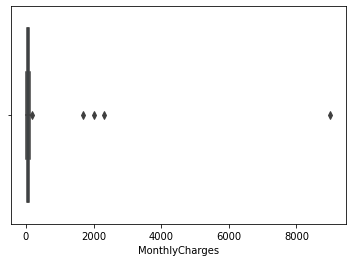

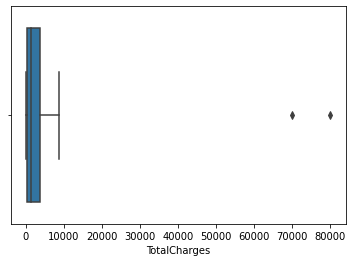

In [79]:
import pandas as pd
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

print('\nPersebaran data sebelum ditangani Outlier: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

# Creating Box Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.boxplot(x=df_load['tenure'])
plt.show()

plt.figure()
sns.boxplot(x=df_load['MonthlyCharges'])
plt.show()

plt.figure()
sns.boxplot(x=df_load['TotalCharges'])
plt.show()



In [91]:
import pandas as pd
df_load = pd.read_csv(
    'https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

# Handling with IQR
Q1 = (df_load[['tenure', 'MonthlyCharges', 'TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure', 'MonthlyCharges', 'TotalCharges']]).quantile(0.75)

IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)

more_than = (df_load > maximum)
lower_than = (df_load < minimum)
df_load = df_load.mask(more_than, maximum, axis=1)
df_load = df_load.mask(lower_than, minimum, axis=1)

print('\nPersebaran data setelah ditangani Outlier: ')
print(df_load[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())

Nilai Maximum dari masing-masing Variable adalah: 
tenure             126.5000
MonthlyCharges     170.6000
TotalCharges      8899.6125
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
tenure             -61.5000
MonthlyCharges     -44.6000
TotalCharges     -4695.0875
dtype: float64

Persebaran data setelah ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  7014.000000     7087.000000   7098.000000
mean     32.696108       64.995837   2287.957576
std      24.606516       30.133477   2268.788381
min       0.000000        0.000000     19.000000
25%       9.000000       36.100000    402.925000
50%      30.000000       70.450000   1400.700000
75%      56.000000       89.900000   3801.600000
max     126.500000      170.600000   8899.612500


<ipython-input-91-205b85c84f1c>:17: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than = (df_load > maximum)
<ipython-input-91-205b85c84f1c>:18: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_than = (df_load < minimum)


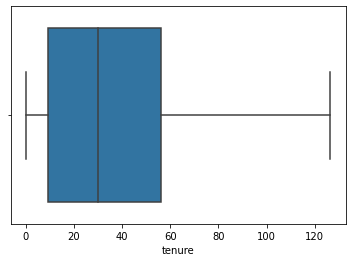

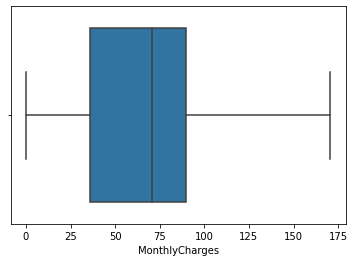

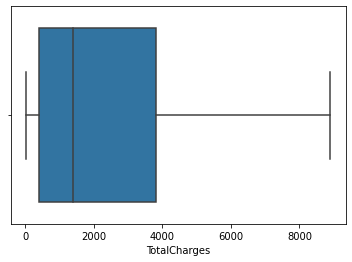

In [92]:
plt.figure()
sns.boxplot(x=df_load['tenure'])
plt.show()

plt.figure()
sns.boxplot(x=df_load['MonthlyCharges'])
plt.show()

plt.figure()
sns.boxplot(x=df_load['TotalCharges'])
plt.show()

## --------------------------------------------------------CHAPTER 6

### Menstandarisasi Nilai

In [105]:
import pandas as pd
df_load = pd.read_csv(
    'https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

# Loop
for col_name in list(['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']):
    print('\nUnique Values Count \033[1m' + 'Before Standardized \033[0m Variable', col_name)
    print(df_load[col_name].value_counts())


Unique Values Count Before Standardized  Variable gender
Male         3581
Female       3512
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Unique Values Count Before Standardized  Variable SeniorCitizen
0    5962
1    1151
Name: SeniorCitizen, dtype: int64

Unique Values Count Before Standardized  Variable Partner
No     3676
Yes    3437
Name: Partner, dtype: int64

Unique Values Count Before Standardized  Variable Dependents
No     4978
Yes    2115
Iya      20
Name: Dependents, dtype: int64

Unique Values Count Before Standardized  Variable PhoneService
Yes    6423
No      690
Name: PhoneService, dtype: int64

Unique Values Count Before Standardized  Variable MultipleLines
No                  3428
Yes                 2995
No phone service     690
Name: MultipleLines, dtype: int64

Unique Values Count Before Standardized  Variable InternetService
Fiber optic    3125
DSL            2451
No             1537
Name: InternetService, dtype: int64

Unique Values Count Befor

In [109]:
import pandas as pd
df_load = pd.read_csv(
    'https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')
df_load = df_load.replace(
    ['Wanita', 'Laki-Laki', 'Churn', 'Iya'], ['Female', 'Male', 'Yes', 'Yes'])


# Loop
for col_name in list(['gender', 'Dependents', 'Churn']):
    print('\nUnique Values Count \033[1m' + 'After Standardized \033[0mVariable', col_name)
    print(df_load[col_name].value_counts())


Unique Values Count After Standardized Variable gender
Male      3587
Female    3526
Name: gender, dtype: int64

Unique Values Count After Standardized Variable Dependents
No     4978
Yes    2135
Name: Dependents, dtype: int64

Unique Values Count After Standardized Variable Churn
No     5195
Yes    1875
Name: Churn, dtype: int64
